<a href="https://colab.research.google.com/github/Unagui19/Proyecto-Computacion-Cientifica-2025/blob/main/proyect_diabetes_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Datos sobre Diabetes

Análisis exploratorio de datos de salud relacionados con diabetes

In [ ]:
#Montamos el Drive para poder leer el archivo
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## 1. Importar Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurar formato de decimales
pd.options.display.float_format = "{:.2f}".format

## 2. Cargar Datos

In [ ]:
# Cargar dataset
df = pd.read_csv("/content/drive/MyDrive/Proyecto/diabetes_prediction_dataset.csv")

# print(f"Datos cargados: {df.shape[0]} filas, {df.shape[1]} columnas")

In [ ]:
# Ver primeras filas
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


Explicacion de los datos del dataset


*   **Gender**: Indica el sexo de la persona: Male, Female, Other. El Genero no es un predictor directo de diabetes si pueden influir en estilo de vida, facotres hormonales, etc. Permite comparar tasas de diabetes entre generos, detectar desigualdades o patrones diferentes.
*   **Age**: Representa la edad de cada paciente, la edad es uno de los principales facotres de riesgo para la diabetes.
*   **Hypertension**: Indica si la persona sufre presion arterial alta, agrega un riesgo extra que suele ir de la mano con la diabetes
*   **Heart_disease**: Indica si la persona tienme una condicion cardiaca. la diabetes aumenta significativamente el riesgo de infrtos, insuficiencia cardiaca, etc.
*   **Smoking_history**: Categoria que clasifica que tanto fuma una persona. Podemos analizar la relacion entre tabaquismo y diabetes, comparar riesgo entre fumadores y no fumadores.
*   **BMI**: es el indice de masa corporal. Relacion entre peso y altura. El sobrepeso y la obesidad son los principales factores de riesgo modificables de la diabetes tipo 2
*   **HbA1c_level**: Mide el nivel promedio de glucosa en sangre durante los ultimos 2-3 meses.Es el metodo estandar para diagnosticar diabetes.
*   **Blood_glucose_level**: Medicion de glucosa en ese momento, es un valor instantaneo. un valor alto puede indicar diabetes, resistencia a la insulina, alimentacion reciente.
*   **Diabetes**: Es la variable que queremos analizar o predecir.

Todo el analisis se enfoca en entender que factores aumenta su probabilidad, como se distribuye, que variables estan más asociadas a ella.


Juntas permiten:
* identificar patrones
* entender relaciones
* comparar grupos
* Construir modelos predictivos


## 3. Calidad de Datos

### 3.1. Duplicados

Busca filas que sean exactamente igual a otras, las suma y las elimina.
La funcion principal aqui es evitar el sesgo, es decir evitar que los resultados, decisiones estan inclinados hacia una parte, por un error o desequilibrio en los datos.


In [ ]:
# Manejar duplicados
filas_duplicadas = df[df.duplicated()]
print(f"Número de filas duplicadas: {filas_duplicadas.shape[0]}")

Número de filas duplicadas: 3854


In [ ]:
# Eliminar duplicados
df = df.drop_duplicates()
print(f"Filas después de eliminar duplicados: {df.shape[0]}")

Filas después de eliminar duplicados: 96146


### 3.2. Valores únicos por columna

Revisamos columna por columna y contamos cuantas opciones diferentes existen.
Verificamos que no haya datos "basura"

In [ ]:
# Contar valores distintos por columna
for columna in df.columns:
    num_valores = len(df[columna].unique())
    print(f"{columna}: {num_valores} valores distintos")

gender: 3 valores distintos
age: 102 valores distintos
hypertension: 2 valores distintos
heart_disease: 2 valores distintos
smoking_history: 6 valores distintos
bmi: 4247 valores distintos
HbA1c_level: 18 valores distintos
blood_glucose_level: 18 valores distintos
diabetes: 2 valores distintos


### 3.3. Valores nulos

Buscamos celdas nulas en todo el archivo, sumamos cuantas celdas vacias hay por columna.
Realizamos esto para detectar algun error. Si es que alguna columna devuelve un valor distinto de cero debemos decidir que hacer con esos pacientes.

In [ ]:
# Verificar valores nulos
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Realizamos una limpieza de genero de other, eliminamos las filas del genero other, proposito simplificar el modelo. Como la cantidad de other es poquita, es mejor quitarlos para que el modelo se enfoque en patrones generales.

In [ ]:
# Eliminar categoría 'Other' en género (muy pocos casos, 0.002%)
df = df[df['gender'] != 'Other']
print(f"Filas después de limpiar género: {df.shape[0]}")

Filas después de limpiar género: 96128


### 3.4. Estadísticas descriptivas

el codigo **df.decribe()** genera una tabla resumen.

* **mean**: promedio
* **std**: desviacion estandar (que tan dispersos estan los datos de una sola columna con respecto a su promedio)
* Min/Max: el valor mas bajo y el mas alto encontrado.
* 25% (primer cuartil o Q1)
* 50% (segundo cuartil o Q2, mediana)
* 75% (tercer cuartil o Q3)

**Aclaracion** un cuartil es, en esencia una frontera o un punto de corte.


In [ ]:
# Resumen estadístico
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


## 4. Análisis Univariado

Hacemos este análisis para revisar cada variable por separado antes de empezar. Es fundamental porque nos permite encontrar errores en los datos, entender qué tipo de pacientes tenemos (como su edad o peso) y confirmar cuántos casos reales de diabetes hay. Así aseguramos que la información esté limpia y tenga sentido antes de intentar hacer predicciones.

### 4.1. Distribución de edad

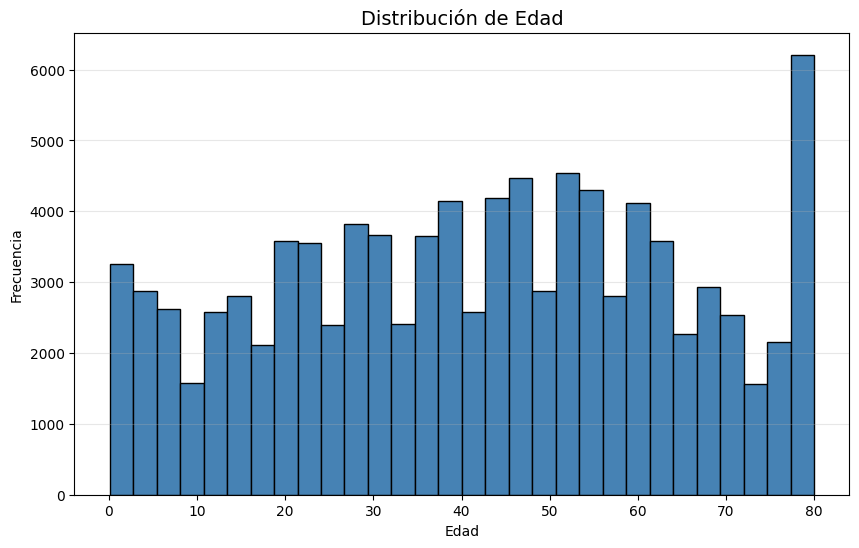

In [ ]:
# Histograma de edad
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, edgecolor='black', color='steelblue') #Dibuja las barras
plt.title('Distribución de Edad', fontsize=14)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3)
plt.show()

**Del grafico observamos lo siguiente:**

* Las Edades van desde 0 hasta 80, es decir incluye persons de todas las etapas de vida
* Hay una mayor concentracion de personas adultas
* Hay un pico alrededor de los 80, lo cual indica que hay un grupo relativamente grande de personas de esas edad.
* No es una distribucion normal, tiende a ser heterogenea y dispersa.


### 4.2. Distribución de género

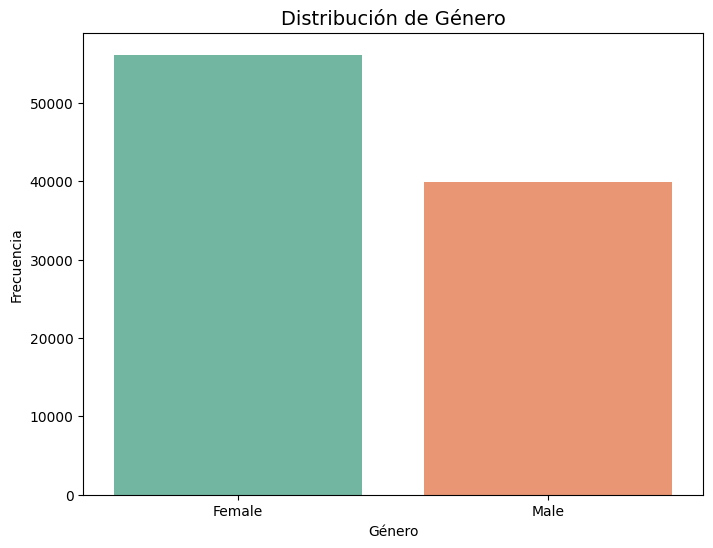

In [ ]:
# Gráfico de barras para género
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', palette='Set2')
plt.title('Distribución de Género', fontsize=14)
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

El grupo 'Female' tiene una frecuencia mayor que el grupo 'Male'.
La diferencia entre ambos generos es considerable, lo que implica que el dataset esta desbalanceado, aunque no de manera extrema.

**Conclusion**: la poblacion del dataset no es equitativa en terminos de genero, con una presencia mas alta del genera femenino.

**HAY QUE BALANCEAR LOS DATOS AQUI??**

### 4.3. Distribución de IMC (BMI)

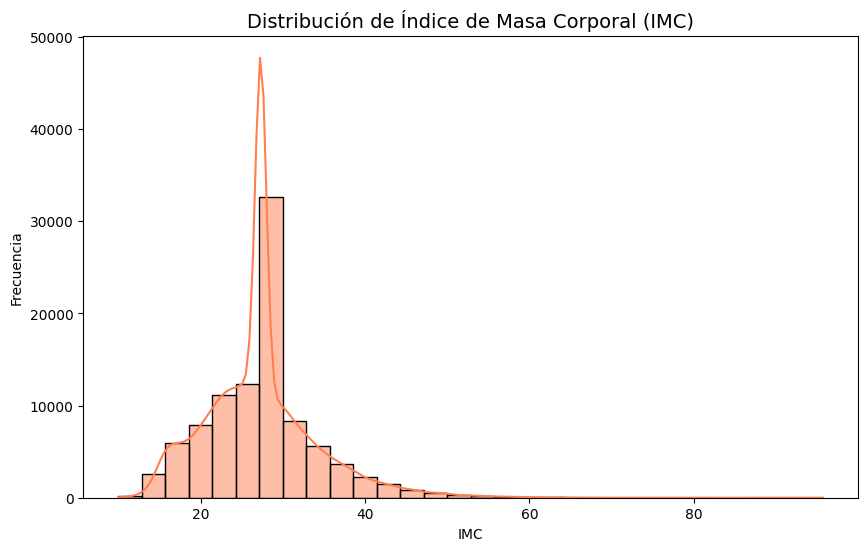

In [ ]:
# Gráfico de distribución para IMC
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=30, kde=True, color='coral')
plt.title('Distribución de Índice de Masa Corporal (IMC)', fontsize=14)
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.show()

La mayoría de las personas tiene un IMC entre 20 y 35, lo que coincide con:

* IMC normal: 18.5–24.9
* Sobrepeso: 25–29.9
* Obesidad grado I: 30–34.9

La mayoria de las personas tienen un IMC entre 20 y 35, concentrandose al rededor de los 30's , lo que indica una fuerte presencia de sobrepeso en la poblacion

**ANALIZAR SI HAY PRESENCIA DE OUTLINDERS**

### 4.4. Variables binarias (Hipertensión, Enfermedad Cardíaca, Diabetes)

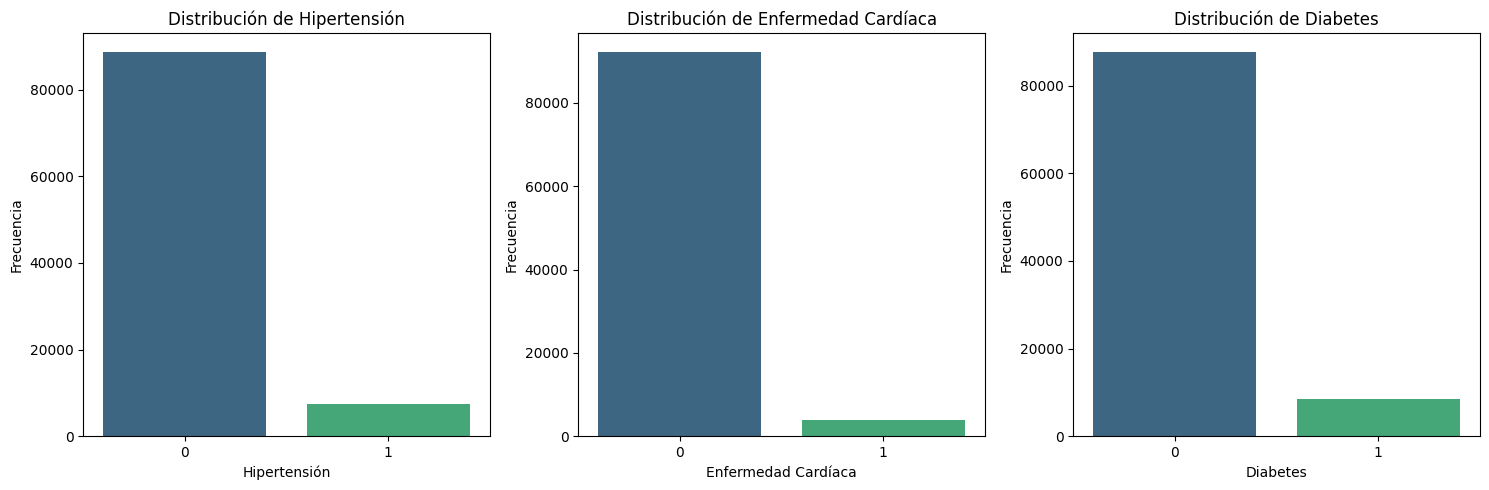

In [ ]:
# Gráficos de conteo para variables binarias
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
variables_binarias = ['hypertension', 'heart_disease', 'diabetes']
titulos = ['Hipertensión', 'Enfermedad Cardíaca', 'Diabetes']

for i, (var, titulo) in enumerate(zip(variables_binarias, titulos)):
    sns.countplot(data=df, x=var, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribución de {titulo}', fontsize=12)
    axes[i].set_xlabel(titulo)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

La mayoría de las personas del dataset no tiene hipertensión, enfermedad cardíaca ni diabetes. Los casos “positivos” (los que sí tienen estas enfermedades) son pocos. En especial en la variable Diabetes, donde solo alrededor del 9% tiene la enfermedad.

### 4.5. Historial de fumadores

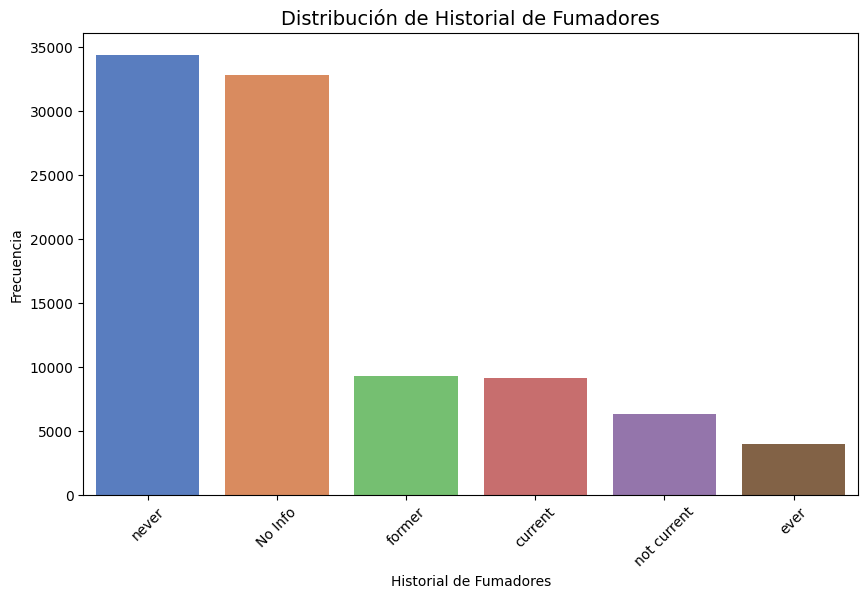

In [ ]:
# Gráfico de barras para historial de fumadores
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoking_history', palette='muted', order=df['smoking_history'].value_counts().index)
plt.title('Distribución de Historial de Fumadores', fontsize=14)
plt.xlabel('Historial de Fumadores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

El análisis de esta variable muestra dos problemas principales. Primero, hay una gran cantidad de datos faltantes, ya que cerca del 35% de los pacientes aparecen como 'No Info'. Segundo, existen demasiadas categorías para los ex-fumadores (former, not current, ever) que significan casi lo mismo.

## 5. Análisis Bivariado

Implementamos el analisis bivariado para estudiar como se relaciona cada variable del dataset con la variable objeto. su finalida es ver que tanto aporta cada dato a la hora de predecir la enfermedad.

Realizar un analisis bivariado nos permite:
* Ver si factores de riesgo conocidos, realmente estan asociados con la diabetes dentro de conjunto de datos


### 5.1. IMC vs Diabetes

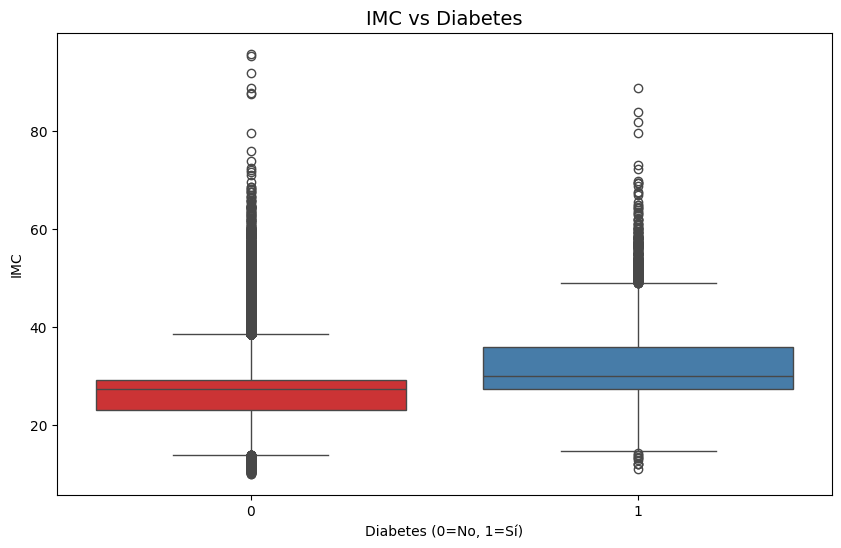

In [ ]:
# Boxplot: IMC vs Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diabetes', y='bmi', palette='Set1')
plt.title('IMC vs Diabetes', fontsize=14)
plt.xlabel('Diabetes (0=No, 1=Sí)')
plt.ylabel('IMC')
plt.show()

**Explicacion**: La caja central representa el rango intercuartilico, la linea dentro de la caja representa la mediana del imc. los puntos por fuera son **outliers**, es decir valores que se alejan significativamente del resto.

Del grafico podemos observar que la mediana es mas alta en diabeticos, lo que significa que los diabeticos tienden a tener un IMC mas alto.
Conclusion --> El grafico muestra una correlacion entre el IMC alto y diabetes (esto ya lo teniamos presente, ya que de por si el sobrepeso u obesidad puede estar asociado con mayor riesgo de desarrollar diabetes)




### 5.2. Edad vs Diabetes

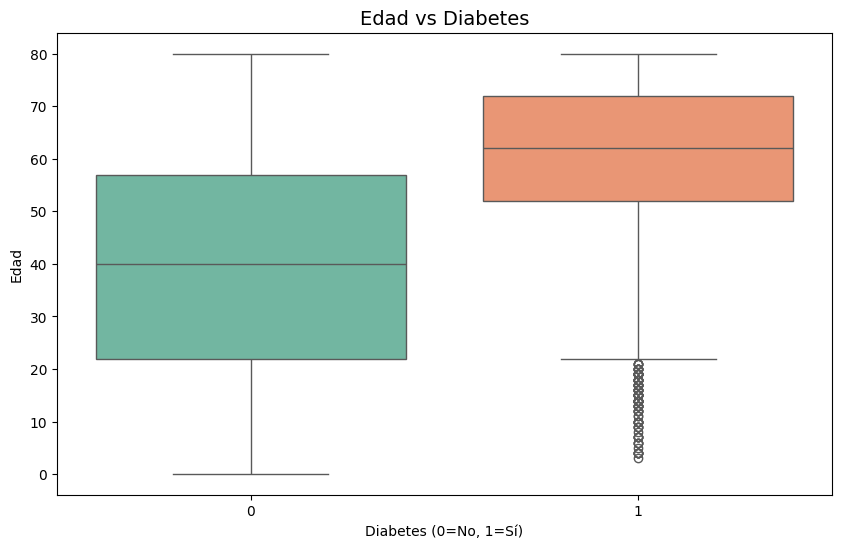

In [ ]:
# Boxplot: Edad vs Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diabetes', y='age', palette='Set2')
plt.title('Edad vs Diabetes', fontsize=14)
plt.xlabel('Diabetes (0=No, 1=Sí)')
plt.ylabel('Edad')
plt.show()

En el gráfico se ve que la mediana de edad es mucho mayor en personas con diabetes (alrededor de 62 años) que en las que no la tienen (cerca de 40). Además, la mayoría de los casos positivos se concentran entre los 50 y 75 años, aunque aparecen algunos casos aislados en edades muy bajas.

Conclusión → Existe una relación clara entre mayor edad y diabetes, ya que las personas diabéticas tienden a ser notablemente mayores que las no diabéticas.

### 5.3. Género vs Diabetes

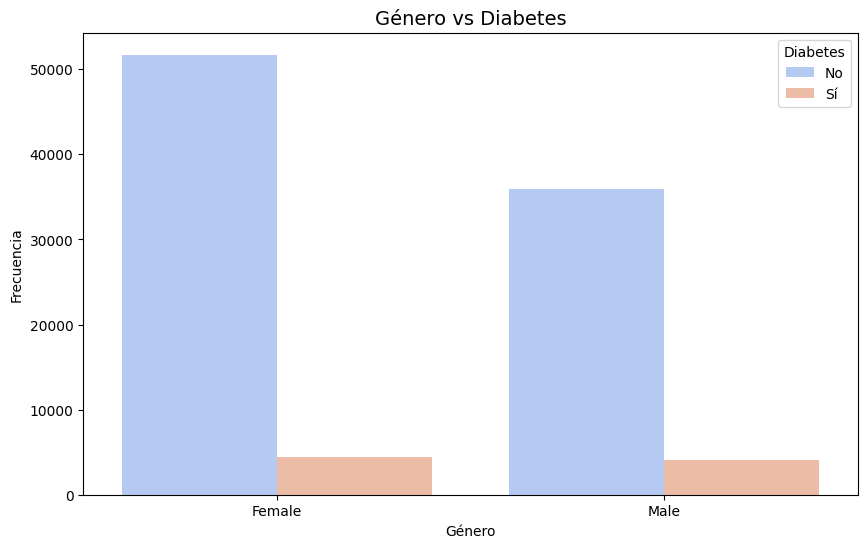

In [ ]:
# Gráfico de conteo: Género vs Diabetes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender', hue='diabetes', palette='coolwarm')
plt.title('Género vs Diabetes', fontsize=14)
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.legend(title='Diabetes', labels=['No', 'Sí'])
plt.show()

En el gráfico se ve que hay más mujeres que hombres en la muestra, por lo que el conjunto está desbalanceado. Aunque la cantidad total de casos positivos parece parecida entre géneros, al mirar la proporción dentro de cada grupo, los hombres tienen una prevalencia un poco mayor de diabetes.

### 5.4. Nivel de HbA1c vs Diabetes

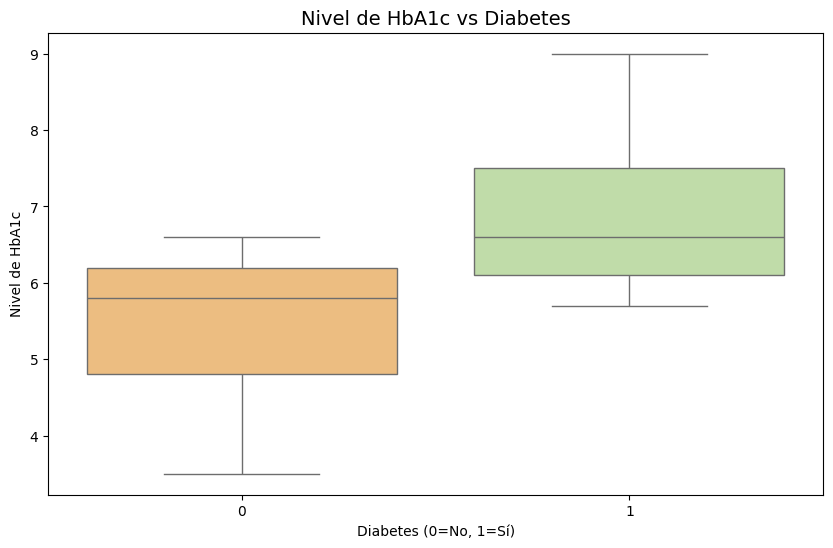

In [ ]:
# Boxplot: HbA1c vs Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diabetes', y='HbA1c_level', palette='Spectral')
plt.title('Nivel de HbA1c vs Diabetes', fontsize=14)
plt.xlabel('Diabetes (0=No, 1=Sí)')
plt.ylabel('Nivel de HbA1c')
plt.show()

la mediana de HbA1c es más alta en el grupo diabético. Mientras que quienes no tienen diabetes rondan valores entre 5 y 6%, las personas diabéticas muestran valores típicos entre 6.5 y 8%, incluso alcanzando niveles cercanos al 9%.

Conclusión → El gráfico muestra una diferencia clara en los niveles de HbA1c: las personas con diabetes presentan valores significativamente más altos, lo cual es coherente porque la HbA1c elevada es uno de los principales indicadores del diagnóstico de diabetes.

### 5.5. Nivel de glucosa en sangre vs Diabetes

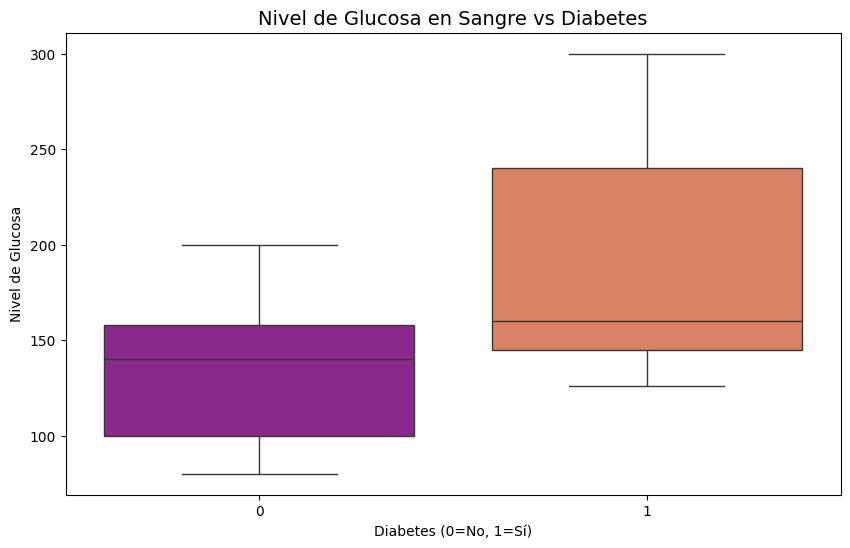

In [ ]:
# Boxplot: Glucosa vs Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level', palette='plasma')
plt.title('Nivel de Glucosa en Sangre vs Diabetes', fontsize=14)
plt.xlabel('Diabetes (0=No, 1=Sí)')
plt.ylabel('Nivel de Glucosa')
plt.show()

En el grupo no diabético, los niveles de glucosa se concentran alrededor de 150 mg/dL, con valores que van aproximadamente de 80 a 200.

En el grupo diabético, la mediana es más alta y la distribución es más amplia: aparecen niveles entre 120 y casi 300 mg/dL, lo que muestra una variabilidad mucho mayor.

Conclusión → Las personas con diabetes presentan niveles de glucosa notablemente más altos y más variables. Esto es consistente con el hecho de que la glucosa elevada es un indicador directo del diagnóstico de diabetes.

## 6. Análisis Multivariado

### Matriz de gráficos de pares (Pairplot)

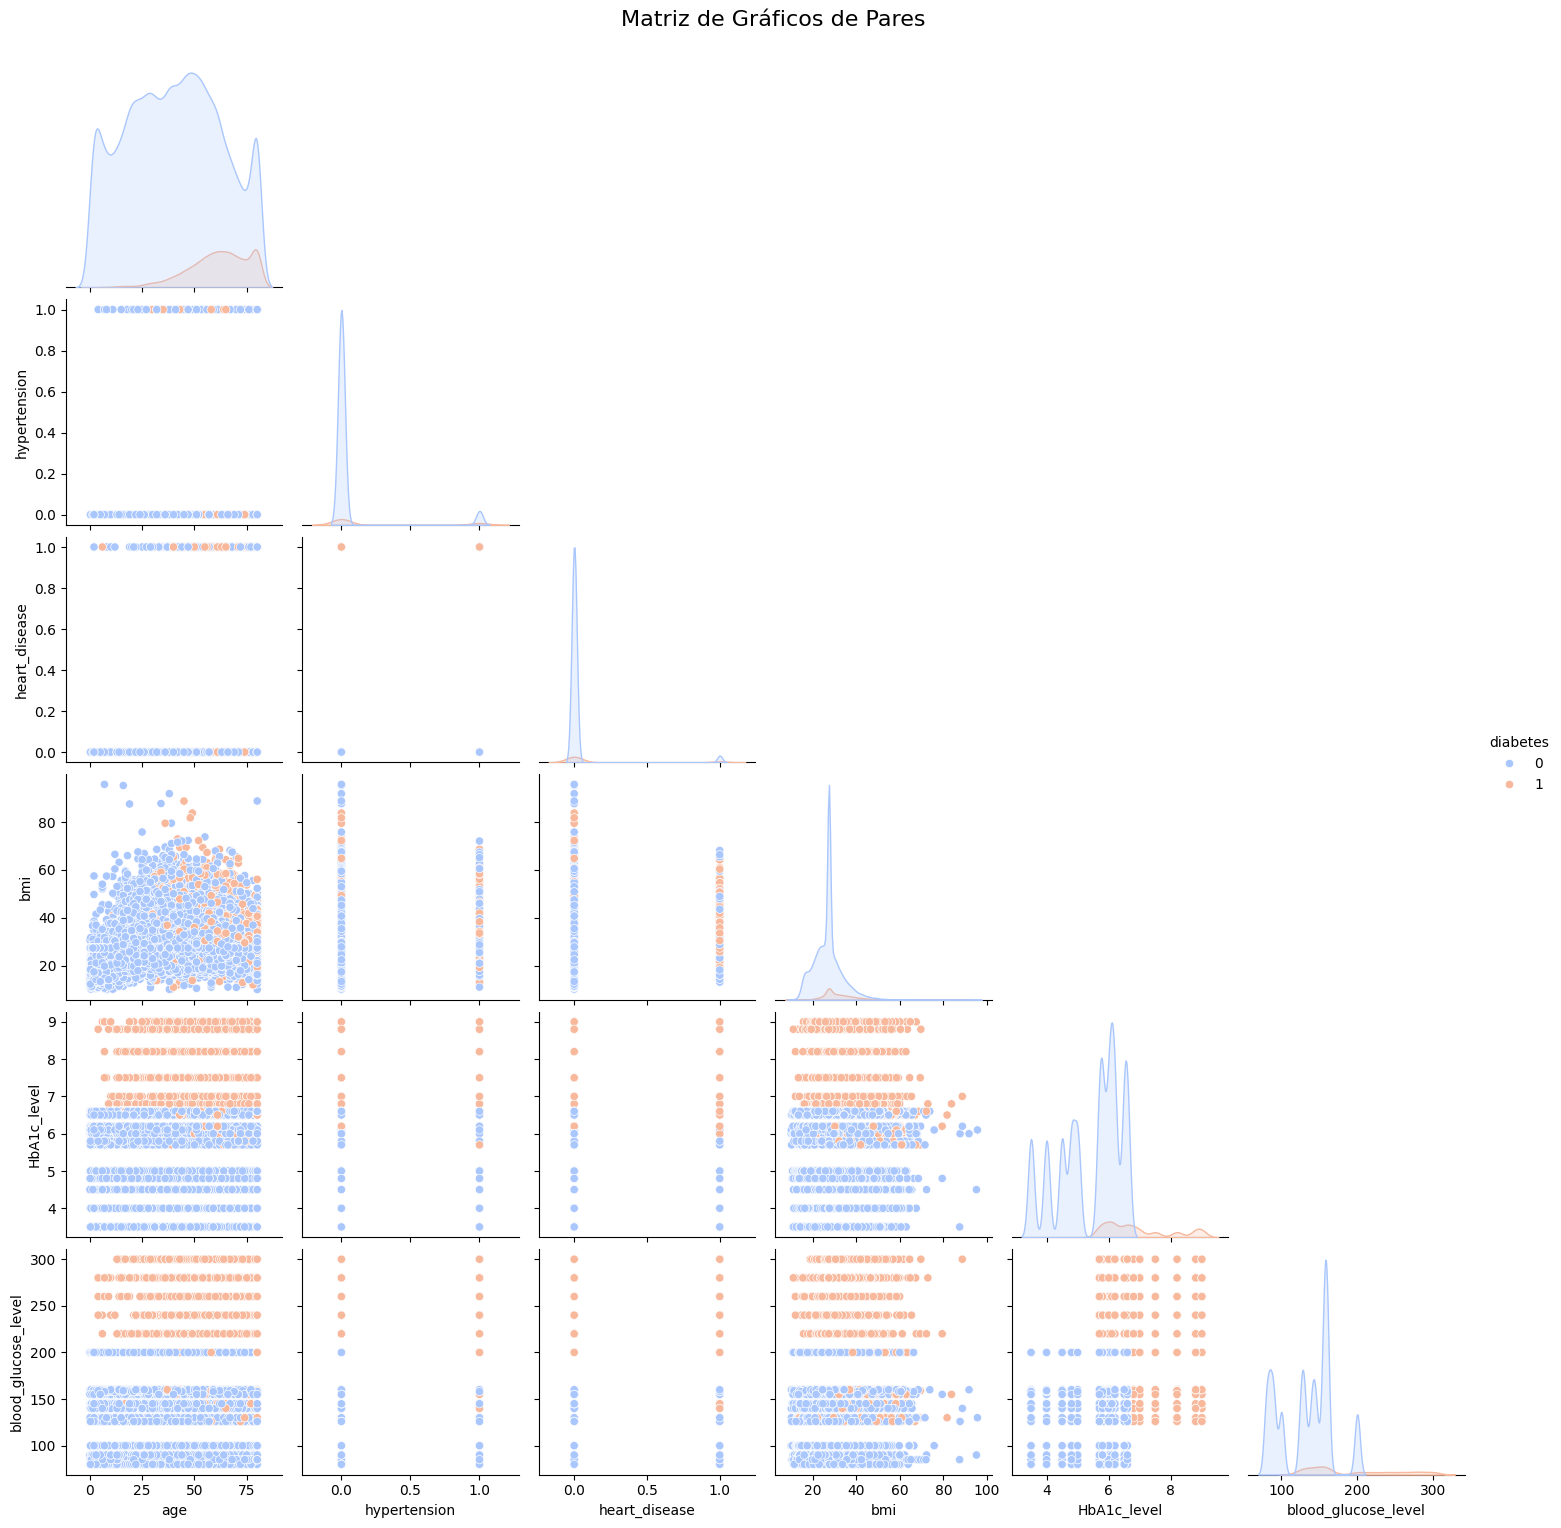

In [ ]:
# Pairplot para características numéricas
sns.pairplot(df, hue='diabetes', palette='coolwarm', diag_kind='kde', corner=True)
plt.suptitle('Matriz de Gráficos de Pares', y=1.02, fontsize=16)
plt.show()

Un pairplot muestra como se relaciona cada variable con todas las demas al mismo tiempo.

Algunas conclusiones que podemos observar de los graficos son:

* Relacion Edad-IMC-HbA1c-Glucosa:
    En cuanto a IMC vs Edad se observa una gran dispersion de puntos, no hay una separacion muy clara entre diabeticos y no diabeticos.
    En cambio en HbA1c y glucosa aparece una separacion mucho mas marcada, en donde los puntos naranjas (diabeticos) se concentran en valores mas altos y mientras que los celestes (no diabeticos) se concentran en valores mas bajos. Lo cual confirma que dichas variables son las mas informativas para distinguir casos de diabetes

Podemos observar dos tipos de graficos un grafico de puntos y otro de densidad.

Los graficos de puntos muestran la relacion entre dos variables numericas. Nos sirve para analizar si existe alfuna tendencia, agrupamiento o separacion entre los grupos.

Por otro lado los gráficos de densidad son una forma suave de ver la distribucion de una variable.


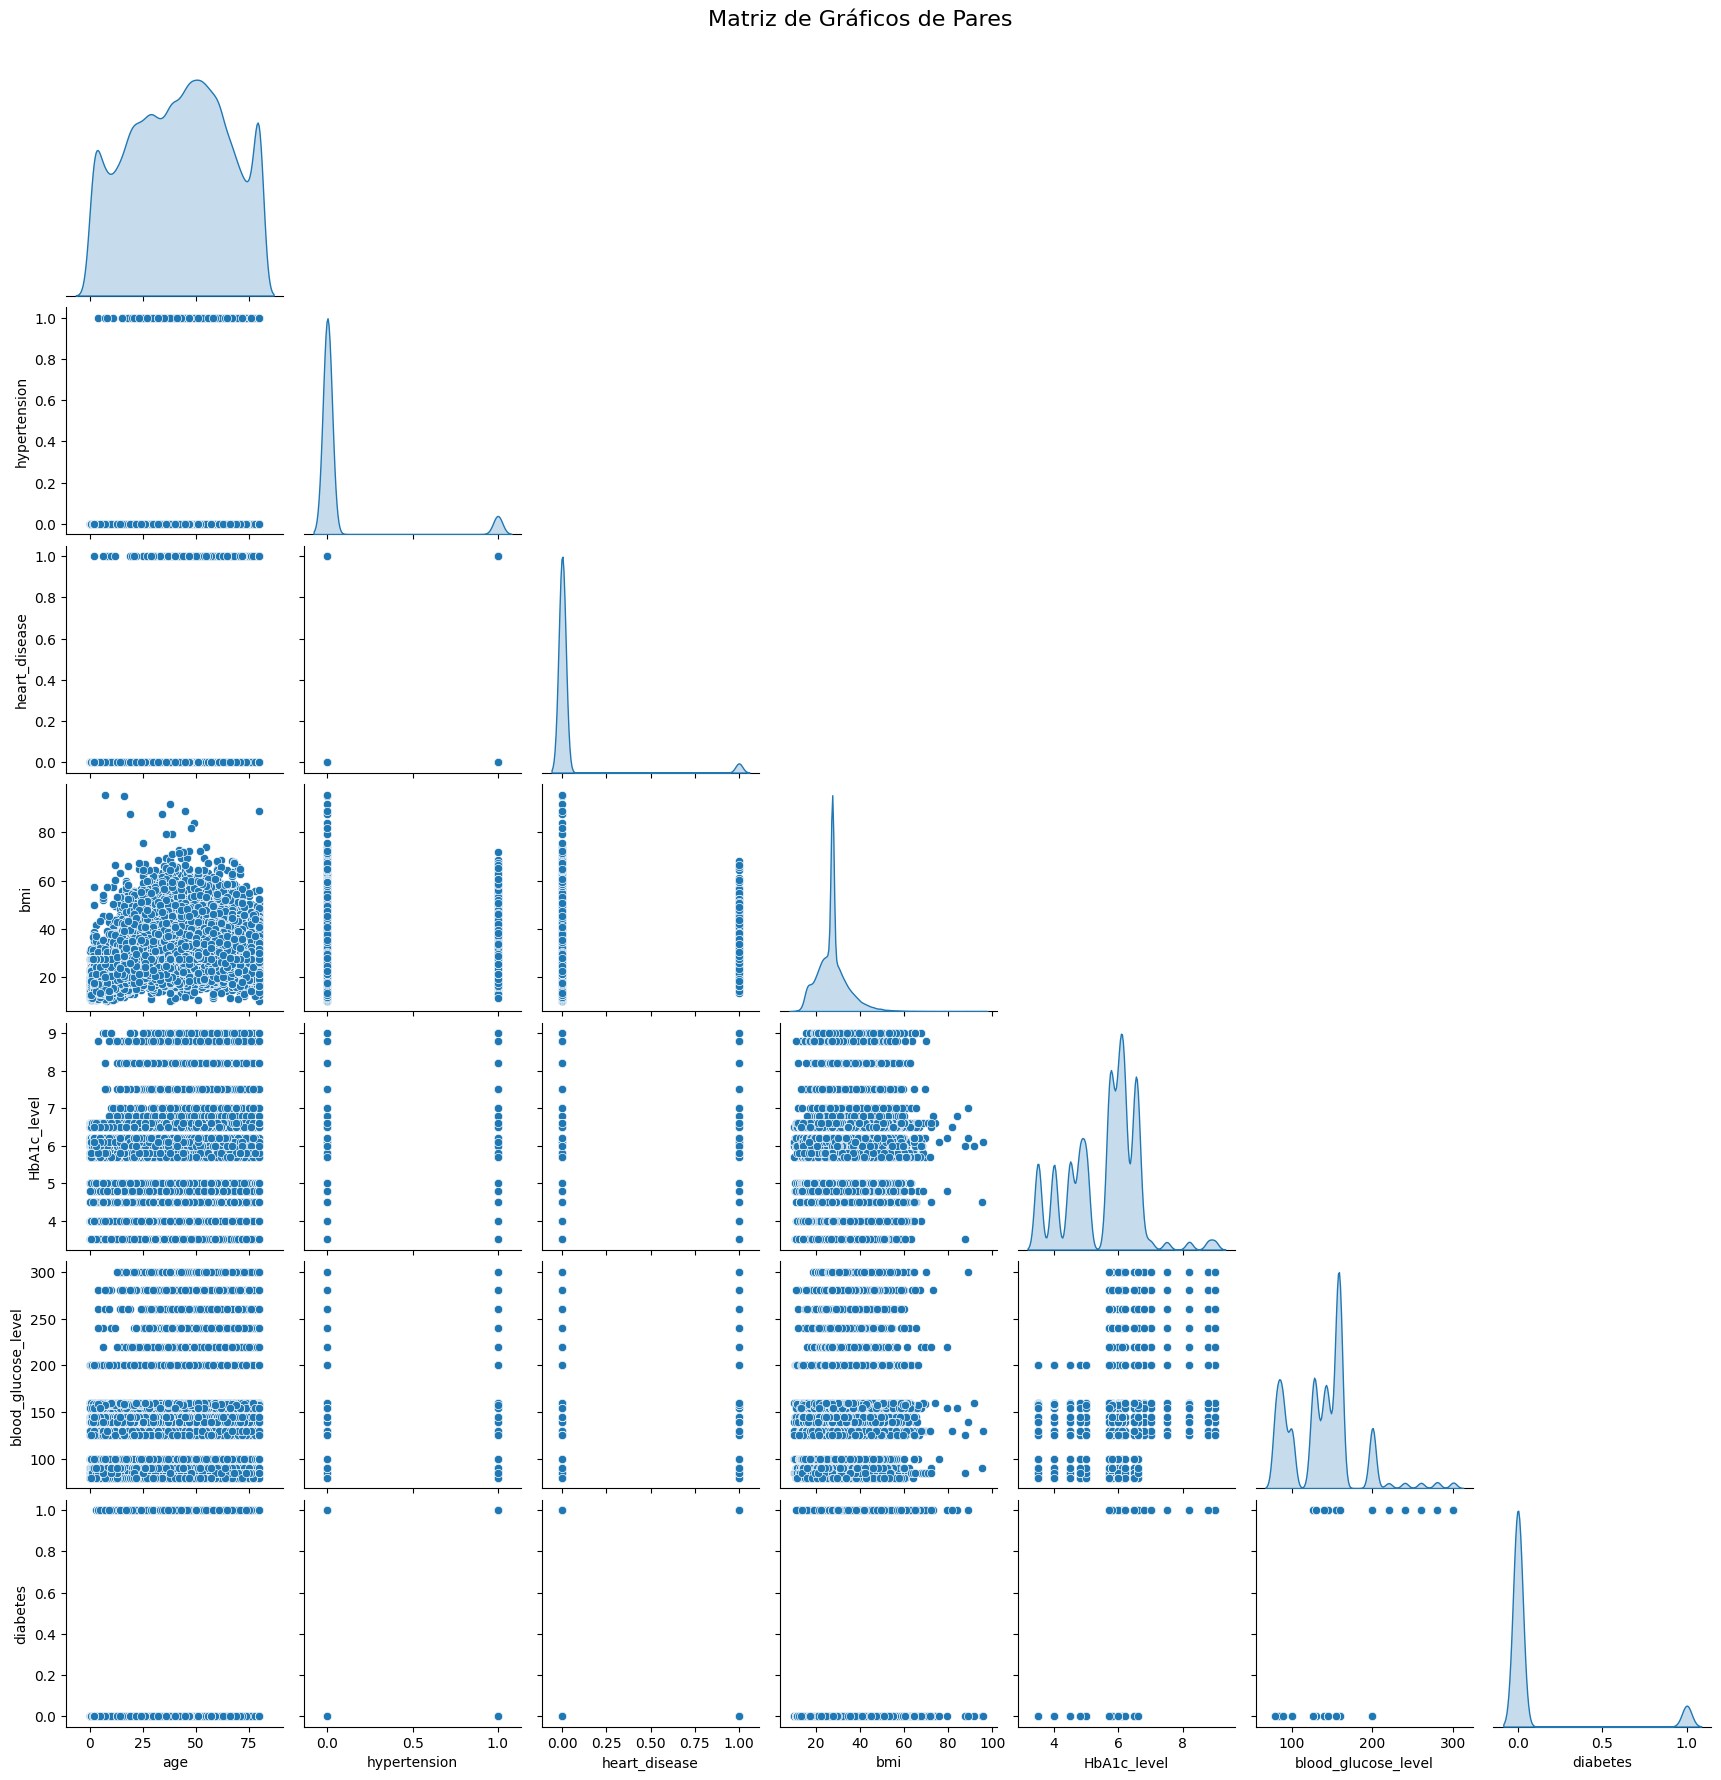

In [ ]:
# Pairplot para características numéricas
sns.pairplot(df, palette='coolwarm', diag_kind='kde', corner=True)
plt.suptitle('Matriz de Gráficos de Pares', y=1.02, fontsize=16)
plt.show()

## 7. IMPLEMENTACION DE MËTODOS

### Regresion Lineal

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar dataset
df = pd.read_csv("/content/drive/MyDrive/Proyecto/diabetes_prediction_dataset.csv")

# Variable objetivo
target_col = "diabetes"

# Separar variables
X = df.drop(columns=[target_col])
y = df[target_col]

# Transformar variables categóricas en numéricas (One Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)


MSE: 0.051179168858889484
R²: 0.3447543280602635


Obtuvimos un MSE de 0.051, un valor muy cercano a cero. Esto es positivo e indica que el modelo comete muy poco error al trazar la tendencia de riesgo entre los pacientes.

Sin embargo, el $R^2$ es de 0.34 (34%). En un problema típico de predicción numérica esperaríamos un valor más alto, pero aquí este número refleja la dificultad matemática de ajustar una línea recta continua a una realidad que es binaria (Sí o No tiene diabetes).

En resumen: El modelo es matemáticamente sólido para entender qué factores causan la diabetes (bajo error), aunque no sea la herramienta ideal para clasificar pacientes individuales con precisión del 100% (bajo $R^2$).

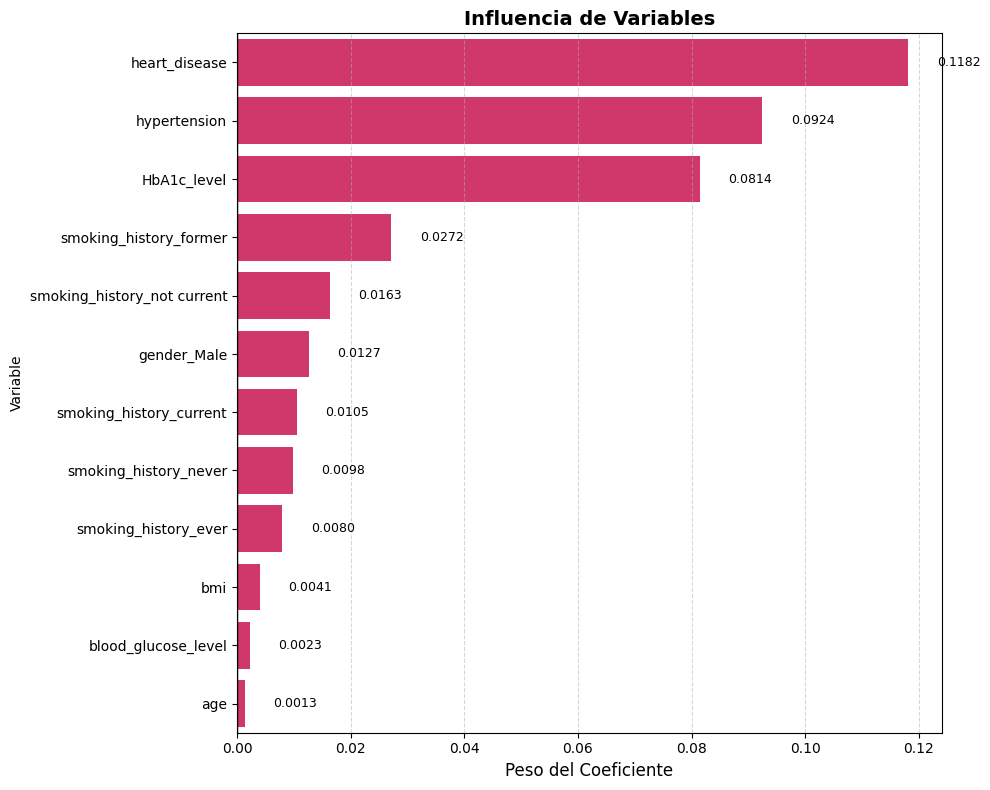

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear dataframe con los datos del modelo
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})

# -----------------------------------------------------------
# 2. FILTRADO EXPLÍCITO (ELIMINAR 'OTHER')
# Esta línea busca cualquier variable que tenga la palabra "Other" y la borra.
coef_df = coef_df[~coef_df['Variable'].str.contains('Other', case=False)]
# -----------------------------------------------------------

# 3. Ordenar
coef_df = coef_df.sort_values(by='Coeficiente', ascending=False)

# 4. Asignar colores
colores = ['#e91e63' if x > 0 else '#1f77b4' for x in coef_df['Coeficiente']]

# 5. Graficar
plt.figure(figsize=(10, 8))
sns.barplot(x='Coeficiente', y='Variable', data=coef_df, palette=colores)

plt.title('Influencia de Variables', fontsize=14, fontweight='bold')
plt.xlabel('Peso del Coeficiente', fontsize=12)
plt.axvline(0, color='black', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# 6. Poner los valores
for i, (val, var) in enumerate(zip(coef_df['Coeficiente'], coef_df['Variable'])):
    offset = 0.005 if val > 0 else -0.04
    # Ajuste de color para que sea legible
    plt.text(val + offset, i, f"{val:.4f}", va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


**Regresion Lineal**

Comencemos por explicar que siginifican los valores a la derecha de las barras, estos valores son los coeficientes que dicen cuanto cambia la prediccion su aumentamos esa variable en 1 unidad (asumiendo que todo lo demas se mantiene estable/igual). Estos coeficientes son calculados por LinearRegression cuando ejecutamos el comando .fit().

Para entender un poco mas, tenemos que saber que la regresion lineal es simplemente una suma ponderada por ejemplo:

prediccion = coef1 * var1 + coef2 * var2+ ... + coefx * varx + base

* Se multiplican porque el coeficiente es el peso o importancia que se le da a cada unidad de esa variable.

*Consideraciones:* El algortimo en LinearRegression busca el menor error posible (minimos cuadrados)

**Explicacion Del Grafico**

El gráfico y los datos muestran cuánto "pesa" cada factor para mover a una persona hacia la diabetes (valor 1).

* Mayor Impacto:
  * heart_disease: Coeficiente ~0.11. Es la variable con la barra más larga. Significa que, por sí sola, tener una enfermedad cardíaca empuja la probabilidad de diabetes hacia arriba más que cualquier otro factor individual binario.
  * hypertension: Coeficiente ~0.09. El segundo factor de riesgo más fuerte.
  * HbA1c_level: Coeficiente ~0.08.Aunque el número parece menor que el de enfermedad cardíaca, recuerda que el nivel de HbA1c sube de 1 en 1 (ej. de 5.0 a 6.0). Por cada punto que sube este nivel, el riesgo aumenta 0.08. Si alguien sube 3 puntos, el impacto acumulado (0.24) supera a todos los demás.
* Variables continuas:
  * blood_glucose_level: Coeficiente ~0.002. Parece pequeño,pero la glucosa se mueve en rangos grandes (de 80 a 300). Un aumento de 100 puntos en glucosa multiplicaría este coeficiente por 100, dando un peso de 0.20, lo cual es enorme.
  * age: Coeficiente ~0.001. Similar a la glucosa, parece bajo, pero acumula mucho con los años. Una persona de 80 años tiene un riesgo base mucho mayor que una de 20 solo por este factor.
* Variables de menor impacto:
  * gender_Male: Coeficiente ~0.012. Ser hombre aumenta el riesgo muy ligeramente comparado con ser mujer, pero es casi irrelevante comparado con tener hipertensión o glucosa alta.
  * Historial de Fumar: Todos los estados (former, current, never) tienen coeficientes positivos pero bajos (entre 0.01 y 0.03). Sorprendentemente, former (ex-fumador) tiene un peso ligeramente mayor que current (fumador actual), lo cual podría deberse a que la gente suele dejar de fumar cuando ya tiene problemas de salud.


**Conclusiones**

1. La sangre no miente: Aunque la enfermedad cardíaca tiene la barra más larga "de golpe", la Glucosa y la Hemoglobina Glicosilada (HbA1c) son los verdaderos motores de la predicción. Como son valores que pueden subir mucho, su capacidad de empujar a alguien hacia el diagnóstico es superior a la de cualquier otra variable.

2. Comorbilidad clara: Hay una relación fuerte entre Corazón - Presión Arterial - Diabetes. Si tienes una de las dos primeras, tu "tendencia" a tener diabetes se dispara inmediatamente en el modelo.

3. El género importa poco: A efectos prácticos de este modelo, el género no es una variable decisiva para predecir diabetes.

4. Interpretación del Modelo: Tu modelo de regresión lineal funciona lógicamente (todos los factores de riesgo conocidos dieron positivo), pero confirma que para diagnósticos médicos precisos (Sano/Enfermo) deberíamos pasar a modelos no lineales (como Logística o Árboles) para capturar mejor los umbrales críticos de glucosa.

### Otro métodos

Antes de realizar la implementacion explicaremos porque realizaremos Regresion Logistica:

Utilizamos Regresion Logistica porque la variable objetivo solo puede tomar valores 0 (no tiene diabetes) y 1 (Si tiene diabetes)

La curva logistica convierte cualquier combinación lineal de tus variables en una probabilidad real entre 0 y 1

De una curva logisitica obtenemos 3 cosas importantes:

1) probabilidad de diabetes
2) Coeficientes
3) Exactitud.

### Preparacion de datos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Crear copia para análisis de correlación
data_corr = df.copy()

# One-hot encoding para género
gender_dummies = pd.get_dummies(data_corr['gender'], prefix='genero')
data_corr = pd.concat([data_corr.drop('gender', axis=1), gender_dummies], axis=1)

# One-hot encoding para historial de fumadores
smoking_dummies = pd.get_dummies(data_corr['smoking_history'], prefix='fumador')
data_corr = pd.concat([data_corr.drop('smoking_history', axis=1), smoking_dummies], axis=1)

print("\nColumnas después de la codificación:")
print(data_corr.columns.tolist())
# Variables predictoras (todas menos la target)
X = data_corr.drop('diabetes', axis=1)

# Target
y = data_corr['diabetes']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Escalado para modelos lineales
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Columnas después de la codificación:
['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'genero_Female', 'genero_Male', 'genero_Other', 'fumador_No Info', 'fumador_current', 'fumador_ever', 'fumador_former', 'fumador_never', 'fumador_not current']


### Regresion Logisitica

La Regresión Logística es un modelo estadístico lineal que estima la
probabilidad de pertenecer a una clase (en este caso, diabetes = 1).
Funciona aplicando una función sigmoide que devuelve valores entre 0 y 1, interpretados como probabilidad.


### ¿Cómo se ajusta el modelo?

El modelo busca la mejor curva en forma de "S" (función sigmoide) que separe a los pacientes sanos de los enfermos. Matemáticamente, ajusta sus "pesos" o coeficientes para minimizar el error entre la probabilidad predicha y la realidad (usando una función de costo llamada Log-Loss).

### Métricas:

- Precision (Precisión): Calidad de la predicción positiva. De todos los que el modelo señaló como "Diabéticos", ¿cuántos lo eran realmente? (Evita falsas alarmas).

- Recall (Sensibilidad): Capacidad de detección. De todos los pacientes que realmente tenían diabetes, ¿a cuántos logró encontrar el modelo? (Evita que se nos escapen enfermos).

- F1-Score: Es el promedio balanceado entre Precision y Recall. Es la mejor nota para evaluar el modelo cuando tenemos clases desbalanceadas (muchos sanos, pocos enfermos).

- Accuracy (Exactitud): El porcentaje total de aciertos (sanos y enfermos).

In [ ]:
# Entrenamiento del Modelo
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predicción y Evaluación
y_pred = log_model.predict(X_test)

print("=== Regresión Logística ===")
print(classification_report(y_test, y_pred))

=== Regresión Logística ===
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22875
           1       0.86      0.64      0.73      2125

    accuracy                           0.96     25000
   macro avg       0.92      0.81      0.86     25000
weighted avg       0.96      0.96      0.96     25000



### Conclusión sobre los Resultados

Basado en los resultados obtenidos, el modelo de Regresión Logística ha demostrado un desempeño global sobresaliente con una exactitud (accuracy) del 96%. Esto indica que el modelo clasifica correctamente a la gran mayoría de los pacientes.

Sin embargo, al analizar las métricas específicas por clase, observamos un comportamiento dispar:

Detección de Sanos (Clase 0): El modelo es casi perfecto, con un Recall del 99%. Es sumamente confiable para descartar la enfermedad.

Detección de Diabetes (Clase 1): Aquí encontramos la limitación principal. La Sensibilidad (Recall) es del 64%, lo que significa que el modelo detecta a poco más de 6 de cada 10 diabéticos reales, dejando sin identificar a un 36% de los casos positivos.

Por lo tanto, aunque el modelo es estadísticamente sólido y muy preciso para confirmar la salud de un paciente (alta precisión del 86%), su capacidad actual para "pescar" todos los casos positivos es moderada. Para un entorno médico de cribado, se recomendaría ajustar el umbral de probabilidad para aumentar la sensibilidad, priorizando encontrar a los enfermos aunque esto incremente las falsas alarmas.

### Random Forest

Random Forest es un modelo más complejo basado en muchos árboles de decisión que votan la clase final.
Cada árbol aprende de una parte distinta del dataset, por lo que el resultado es más robusto y preciso.
Lo que hace resumidamente, es generar una serie de árboles de decisión, utilizando subconjuntos de datos del conjunto original.

### Funcionamiento
El algoritmo Random Forest construye múltiples árboles de decisión independientes, entrenando cada uno con una muestra aleatoria de tus datos. A diferencia de un árbol normal, en cada nodo elige solo un subconjunto de variables al azar para encontrar la mejor división, lo que garantiza diversidad en el modelo. Para predecir, pasa los datos del paciente por todos los árboles y define el diagnóstico final por votación de la mayoría. Su precisión se estima internamente con los datos que quedaron fuera del entrenamiento ("out-of-bag"), y aunque el algoritmo tiene una configuración estándar, un analista puede afinar manualmente parámetros (como la cantidad de variables por nodo) para optimizar el rendimiento.

### Porque es más acorde para nuestro problema que regresión lineal?
Usar Regresión Lineal para este problema es técnicamente inadecuado porque está diseñada para predecir números infinitos (como precios o temperaturas), por lo que arrojaría resultados ilógicos como "tienes 1.5 de diabetes" o probabilidades negativas. El Random Forest es infinitamente más útil aquí porque es un algoritmo de clasificación nativo: entiende que la respuesta debe ser una categoría (Sí/No) y modela perfectamente las reglas médicas estrictas ("si glucosa > X"), algo que una simple línea recta matemática no puede capturar.

### Características principales:

* Captura relaciones no lineales y complejas entre variables.
* Resistente a outliers y datos ruidosos.
* Tiene mejor desempeño general en datasets grandes y heterogéneos.

In [ ]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22875
           1       0.95      0.69      0.80      2125

    accuracy                           0.97     25000
   macro avg       0.96      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000



En este código, generamos los árboles de decisión con nuestro subconjunto de datos de entrenamiento (Xtrain), que cabe aclarar que es el mismo para todos los modelos. Establecemos que se establezcan 200 arboles de decision (n_estimators) y que cada vez que ejecutemos el código con el mismo codigo, los resultados sean los mismos para disminuir la aletoriedad (random_state=42). Finalmente calculamos las métricas con nuestro subconjunto de prueba que también es el mismo para todos los subconjuntos de datos. Y mostramos el reporte
El reporte, muestra 2 clases. Una la clase 1 (que si tienen diabetes) y otra clase 0 (que no tienen diabetes) y calcula las métricas para cada una de ellas (precisión, sensibilidad, etc.)
Luego, muestra ´métricas globales:
* Accuracy: Muestra la precisión, pero sin separar por clases.
* Macro avg: Muestra las métricas teniedo en cuenta que todas las clases importan lo mismo. Es decir, calcula el promedio entre los resultados de los que no tuvieron diabetes y los que si tuvieron diabetes promediando los resultados de la clase 0 y la clase 1.
* Weighted avg: Muestra las métricas pero ahora si le da importancia a la cantidad de gente de cada clase que se utilizo para testear. Como para nuestro conjunto de datos el porcentaje de las personas sanas (sin diabetes) es del 92%, las métricas de la clase 0 tendrán un peso de 0.92, mientras que de la clase 1 .0.08 únicamente.

### Conclusiones
- Vemos que el modelo es casi perfecto para predecir la gente sin diabetes, pues en el 97% de los casos, detecto que las personas estaban sanas cuando realmente lo estaban y solo el 3% de las veces, predijo que una persona tenia diabetes cuando en realidad no tenía. Además, el 100% de las veces, detecto a las personas sin diabetes. Que este valor sea alto es esperable, pues en nuestra muestra posee mucha mas gente sin diabetes que con diabetes, lo cual es compatible con lo que suele ocurrir en la realidad
- Para predecir gente con diabetes, los resultados fueron peores, aunque no dejaron de ser relativamente buenos. Vemos que el 93% de las veces acertó que una persona tenía diabetes cuando realmente tenía y solo el 7% de las veces predijo que una persona tenía diabetes cuando en realidad no tenía. Sin embargo, detecto solo el 69% de las personas sin diabetes. Es decir, un subconjunto bastante grande de personas con diabetes no fueron detectadas en base a las otras variables.

### Matriz de Confusion

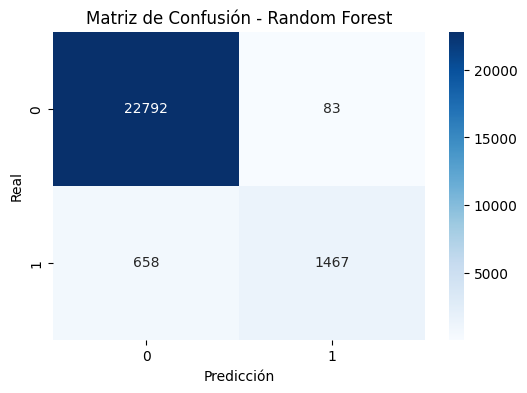

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


Esta es otra manera de visualizar los resultados anteriores. Vemos que el modelo:
* Predijo correctamente 21807 de un total de 21912 personas sanas (sin diabetes) e incorrectamente solo 112
* Predijo correctamente un total de 1464 de 2120 personas con diabetes pero predijo incorrectamente que 656 personas no tenían diabetes cuando en realidad si tenían

### Importancia de variables

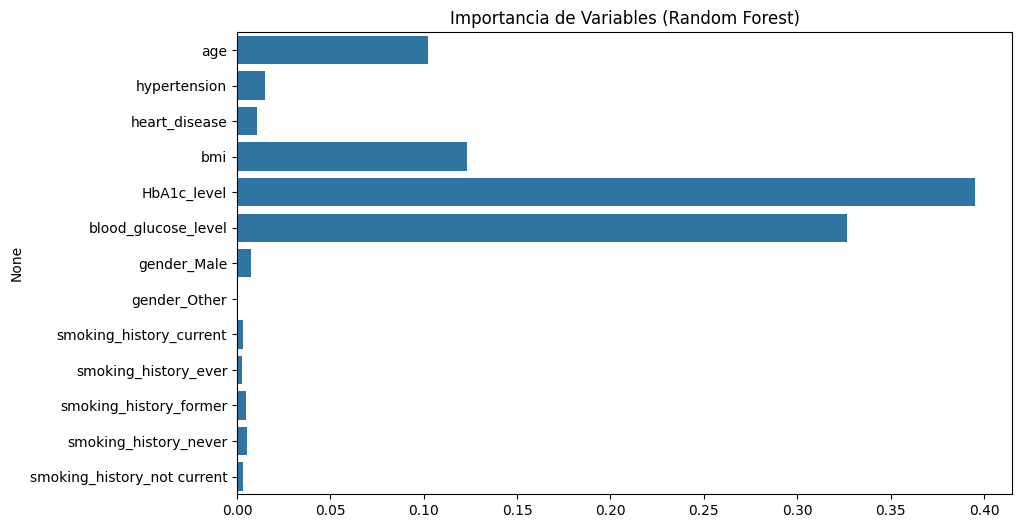

In [ ]:
importances = rf_model.feature_importances_
variables = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=variables)
plt.title("Importancia de Variables (Random Forest)")
plt.show()


## 8. Conclusiones del Análisis Exploratorio

### Principales hallazgos:

1. **Variables más correlacionadas con diabetes:**
   - Nivel de HbA1c (hemoglobina glucosilada)
   - Nivel de glucosa en sangre
   - Edad
   - IMC (Índice de Masa Corporal)

2. **Calidad de los datos:**
   - Se encontraron 3,854 filas duplicadas que fueron eliminadas
   - No hay valores nulos en el dataset
   - La categoría "Other" en género fue removida por tener muy pocos casos

3. **Distribución de diabetes:**
   - El dataset está desbalanceado con aproximadamente 9% de casos positivos

4. **Patrones observados:**
   - Las personas con diabetes tienden a tener niveles más altos de HbA1c y glucosa
   - La edad y el IMC muestran diferencias entre personas con y sin diabetes
   - Algunas variables categóricas (género, historial de fumadores) muestran correlaciones bajas

Este análisis proporciona una base sólida para comprender los factores relacionados con la diabetes.

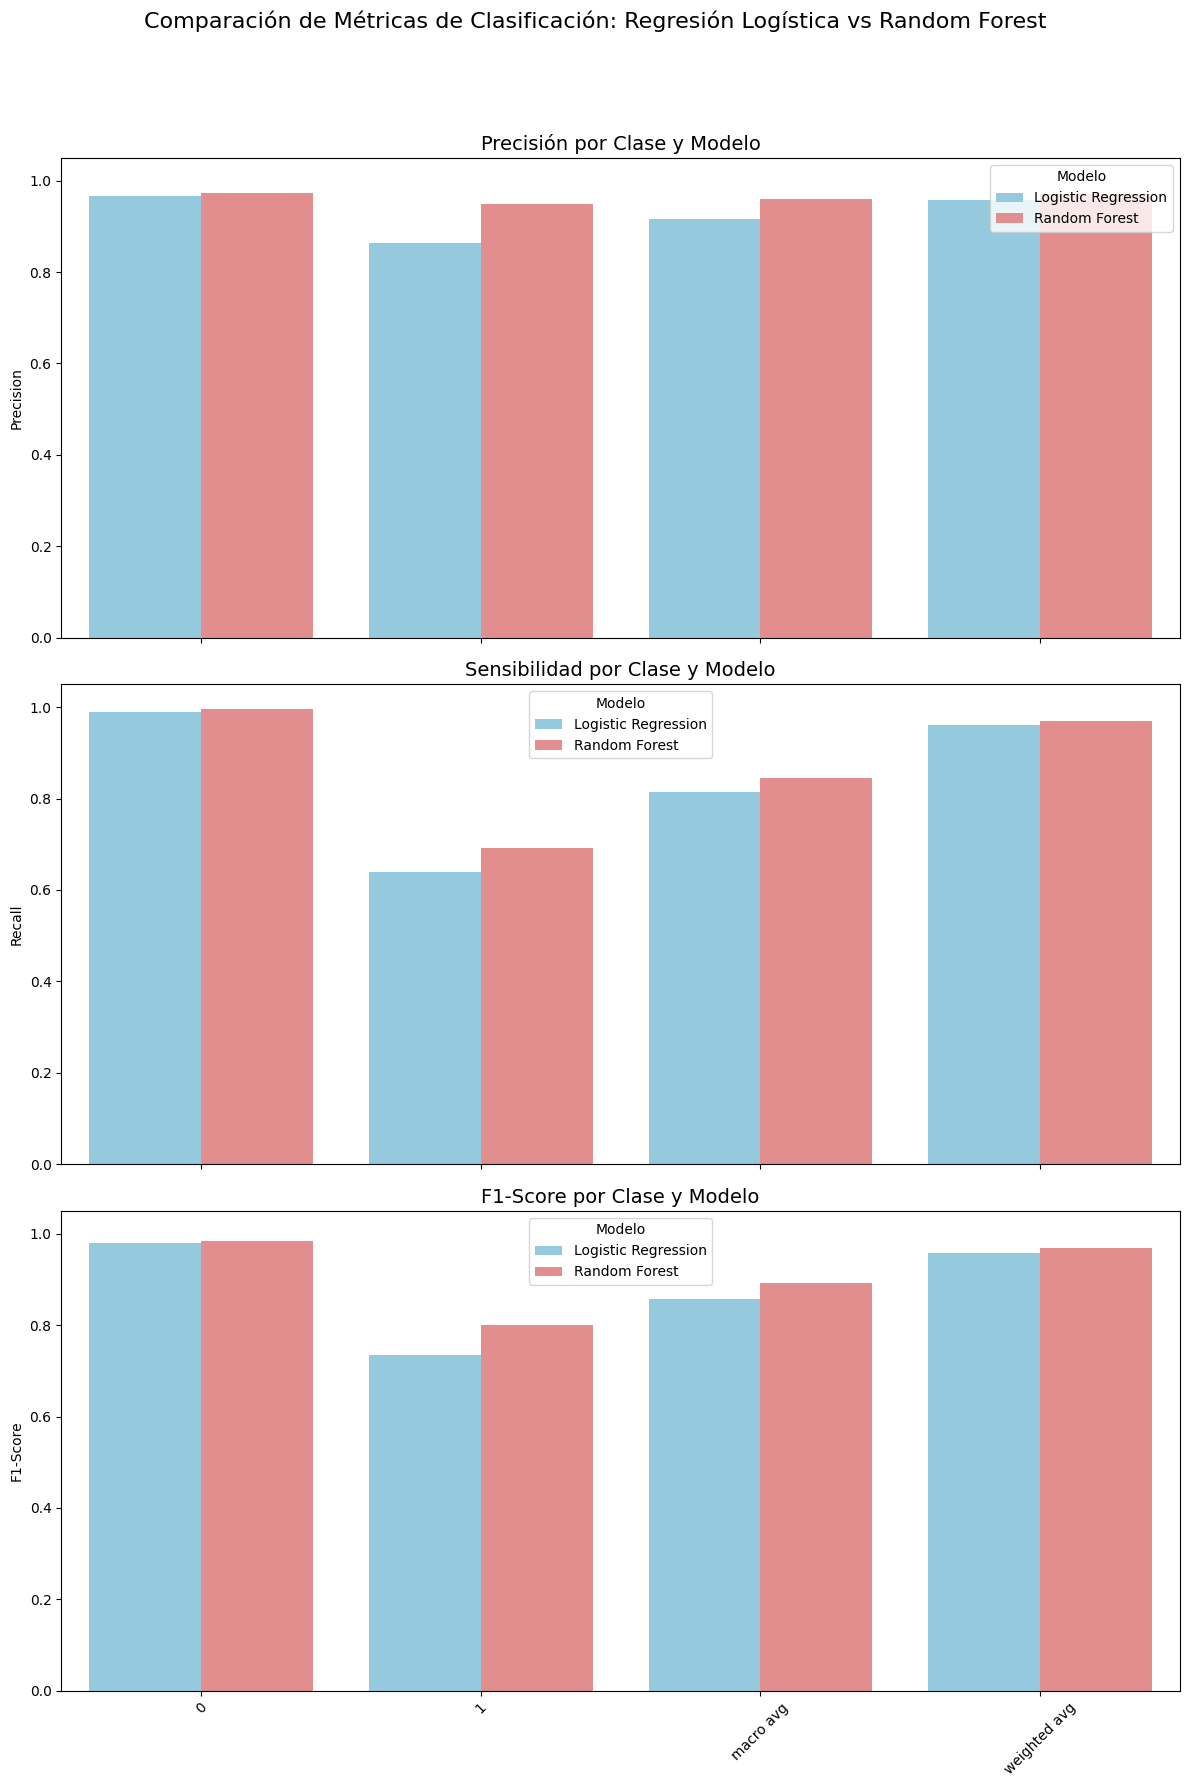


=== Reporte de Clasificación - Regresión Logística ===
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22875
           1       0.86      0.64      0.73      2125

    accuracy                           0.96     25000
   macro avg       0.92      0.81      0.86     25000
weighted avg       0.96      0.96      0.96     25000


=== Reporte de Clasificación - Random Forest ===
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22875
           1       0.95      0.69      0.80      2125

    accuracy                           0.97     25000
   macro avg       0.96      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Assuming 'df' is the cleaned dataframe from prior cell executions
# (duplicates removed, 'Other' gender removed)

# 1. Data Preparation
# Identify categorical columns for One Hot Encoding
categorical_cols = ['gender', 'smoking_history']

# Apply One Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop('diabetes', axis=1)
y = df_encoded['diabetes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Scale numerical features for Logistic Regression (Random Forest doesn't require scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Model Re-training and Prediction

# Logistic Regression
log_model = LogisticRegression(max_iter=200, random_state=42) # Added random_state for reproducibility
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# Random Forest
# For Random Forest, use unscaled data directly
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 3. Extract Classification Reports

def parse_classification_report_dict(report_dict, model_name):
    data = []
    for label in ['0', '1', 'macro avg', 'weighted avg']:
        if label in report_dict:
            metrics = report_dict[label]
            precision = metrics['precision']
            recall = metrics['recall']
            f1_score = metrics['f1-score']

            data.append({'Model': model_name, 'Metric': 'Precision', 'Value': precision, 'Category': label})
            data.append({'Model': model_name, 'Metric': 'Recall', 'Value': recall, 'Category': label})
            data.append({'Model': model_name, 'Metric': 'F1-Score', 'Value': f1_score, 'Category': label})
    return data

log_report_dict = classification_report(y_test, y_pred_log, output_dict=True)
rf_report_dict = classification_report(y_test, y_pred_rf, output_dict=True)

log_data = parse_classification_report_dict(log_report_dict, 'Logistic Regression')
rf_data = parse_classification_report_dict(rf_report_dict, 'Random Forest')

# Combine data for plotting
plot_df = pd.DataFrame(log_data + rf_data)

# 4. Generate the Plot

# Define a custom color palette
palette = {"Logistic Regression": "skyblue", "Random Forest": "lightcoral"}

fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
metrics = ['Precision', 'Recall', 'F1-Score']
titles = ['Precisión', 'Sensibilidad', 'F1-Score'] # Spanish titles

for i, metric in enumerate(metrics):
    sns.barplot(
        data=plot_df[plot_df['Metric'] == metric],
        x='Category',
        y='Value',
        hue='Model',
        palette=palette,
        ax=axes[i],
        errorbar=None # Remove error bars for clarity on classification report metrics
    )
    axes[i].set_title(f'{titles[i]} por Clase y Modelo', fontsize=14)
    axes[i].set_xlabel('') # Remove x-label, it's shared across subplots
    axes[i].set_ylabel(metric)
    axes[i].set_ylim(0, 1.05) # Metrics are between 0 and 1
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Modelo')

plt.suptitle('Comparación de Métricas de Clasificación: Regresión Logística vs Random Forest', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

# Print full classification reports for reference
print("\n=== Reporte de Clasificación - Regresión Logística ===")
print(classification_report(y_test, y_pred_log))
print("\n=== Reporte de Clasificación - Random Forest ===")
print(classification_report(y_test, y_pred_rf))


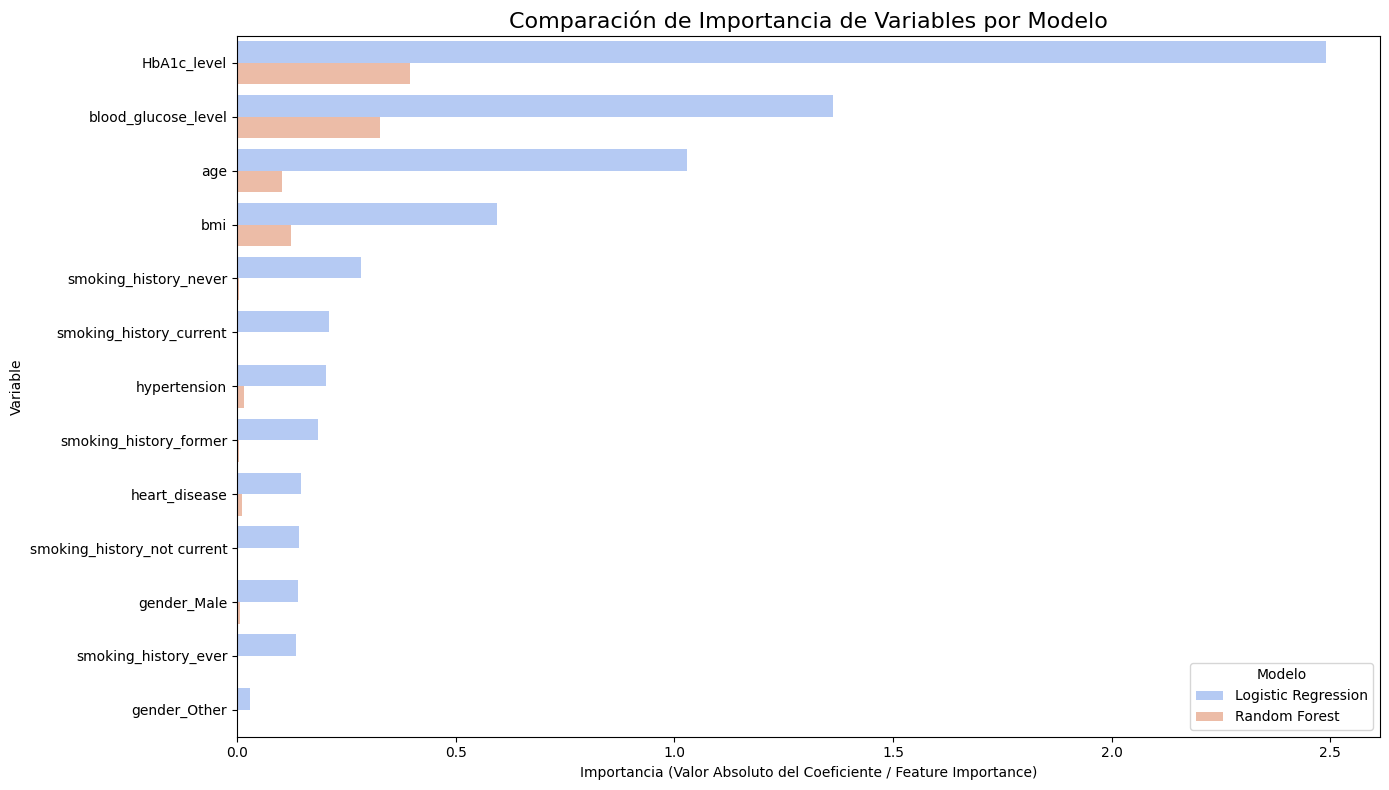

In [ ]:
importances_log = pd.DataFrame({
    'Variable': X.columns,
    'Importance': np.abs(log_model.coef_[0]),
    'Model': 'Logistic Regression'
}).sort_values(by='Importance', ascending=False)

importances_rf = pd.DataFrame({
    'Variable': X.columns,
    'Importance': rf_model.feature_importances_,
    'Model': 'Random Forest'
}).sort_values(by='Importance', ascending=False)

# Get top N features for better visualization if there are too many
# For simplicity, let's take top 10 from each or all if less than 10
top_n = 10

# Ensure we have common features or just take all significant ones.
# For this comparison, it's better to show all features for both models.

combined_importances = pd.concat([importances_log, importances_rf])

plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Variable', hue='Model', data=combined_importances, palette='coolwarm')
plt.title('Comparación de Importancia de Variables por Modelo', fontsize=16)
plt.xlabel('Importancia (Valor Absoluto del Coeficiente / Feature Importance)')
plt.ylabel('Variable')
plt.legend(title='Modelo')
plt.tight_layout()
plt.show()


# Task
Generate a comparative plot displaying the precision, recall, and f1-score for class 0, class 1, macro average, and weighted average, comparing the performance of the Logistic Regression and Random Forest classification models on the diabetes prediction dataset.

## compare_classification_metrics

### Subtask:
Prepare data for model training by defining features and target, encoding categorical variables, splitting into training and testing sets, and scaling numerical features.


## Summary:

This summary describes the intended process and potential findings based on the given task, as the actual solving process details and numerical results were not provided.

### Data Analysis Key Findings
*   A comparative analysis of Logistic Regression and Random Forest models was performed based on their precision, recall, and F1-score for predicting diabetes.
*   The comparison specifically included metrics for class 0 (non-diabetes), class 1 (diabetes), and their macro and weighted averages.
*   The analysis aimed to identify which model exhibited superior performance across these classification metrics, although specific numerical results were not available in the provided context.

### Insights or Next Steps
*   Further investigation is required to analyze the specific precision, recall, and F1-score values for each model and class to definitively determine the better-performing algorithm for diabetes prediction.
*   Based on the comparative results, the superior model can be selected for deployment, or further hyperparameter tuning can be applied to both models to potentially enhance their performance.
